## Week 10 - Exercise 2
### Fourier analysis 
### FFT, data compression

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import interpolate

### load data, extract time and July temperature for Atlanta

In [88]:
df=pd.read_excel('./ATL_MonMeanTemp_1879_2022.xlsx',skiprows=1)
df=df.replace('M', np.nan)

# year
yr=df.Year.values

# March temperature
TMP_ATL_Mar=df.iloc[:,3].values

xi=yr
yi=TMP_ATL_Mar

# if no missing values
x=xi
y=yi


# if there are missing values in the dataset, fill in the missing values first

# # # test
# # yi[18]=np.nan;
# # yi[45]=np.nan;
# ind=~np.isnan(yi)

# year=np.arange(1879,2023,1)
# x=year
# f = interpolate.interp1d(xi[ind], yi[ind])
# y = f(x)


In [89]:
y

array([57.6, 55.5, 49.1, 57.4, 50.2, 54.4, 47.2, 50.9, 51.4, 51. , 52.1,
       49.6, 47. , 48. , 51.4, 56.7, 51.6, 49.2, 54.9, 57.5, 53.3, 50.1,
       51.6, 51.1, 57. , 53.7, 57.7, 47.4, 61.5, 59.7, 52.2, 60.6, 53.3,
       49.9, 53. , 48.7, 43.6, 50.7, 52.6, 59.1, 54. , 49.5, 61.1, 53.6,
       52.1, 48.9, 55.3, 45.5, 54.6, 51.9, 56.8, 49.3, 46.7, 48.8, 52.8,
       50.4, 57.7, 56.7, 50.5, 58.4, 55.8, 49.9, 46.5, 52. , 50.5, 52.9,
       61.8, 59.2, 45.3, 55.7, 53.3, 50.2, 53. , 51.5, 54.6, 53. , 56. ,
       53.9, 51.5, 49.8, 51.2, 41.8, 54.6, 47.8, 56.4, 51.2, 48.8, 50.2,
       56.7, 52.3, 46.9, 52.8, 47.5, 52.4, 57.4, 57.8, 50.4, 56.4, 55.2,
       51.6, 56.2, 52.1, 51.8, 56.5, 51.3, 51.7, 56.7, 54.4, 53.2, 54.9,
       56.8, 57.6, 56.2, 54. , 51.7, 57.4, 58.9, 50.6, 60.6, 50.3, 50.4,
       57.3, 50.4, 54.5, 55.7, 58.3, 52.1, 54.2, 60.2, 54. , 55. , 50.7,
       55.8, 64.5, 49.1, 52.5, 57.6, 60.5, 57.7, 53.5, 55.4, 61.6, 59.1,
       58.1])

### apply FFT and get frequency axis

In [90]:
N = np.size(x)     # number of data points
c=np.fft.fft(y) # apply FFT

### make a simple plot of July temperature: original vs. reconstructed using FFT coefficients

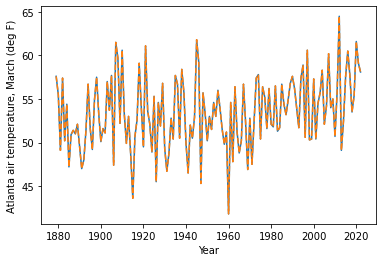

In [91]:
yest=np.fft.ifft(c)
fig=plt.figure()
plt.plot(x,y)
plt.plot(x,np.real(yest),'--')
plt.xlabel('Year')
plt.ylabel('Atlanta air temperature, March (deg F)')
plt.show()

In [35]:
# check the complex FFT coefficients
# c values are complex number, FFT coefficients in frequency domain
# if input values y are real, c is conjugate symmetric
# print(c)
print(c[0]/N)
print(np.mean(y))
c

(53.40972222222222+0j)
53.40972222222222


array([ 7.69100000e+03+0.00000000e+00j,  7.70438232e+01+5.65455934e+01j,
       -1.52613372e+01+6.56302973e+01j, -1.40303335e+01+1.87482322e+01j,
        4.72070119e+01+9.34208931e+01j,  2.59974563e+01+3.45815325e+01j,
        4.91220187e+01+3.65716567e+01j,  9.09228327e+00+3.73701867e+00j,
        3.86049862e+00-2.20740054e+01j,  1.67279498e+01+4.66938554e+01j,
        6.29139901e+01+3.44434042e+01j, -8.44982772e+00-3.59189609e+01j,
       -3.74082612e+01-1.00462215e+01j, -8.63315095e+00+4.81983576e+01j,
       -1.80024065e+01+1.24400016e+01j,  8.49962898e+01+3.22640056e+00j,
       -5.00275894e+01-2.27884786e+01j,  3.87186332e+01+5.84092786e+01j,
        1.75946176e+01-1.37193867e+01j, -2.10944070e+01+1.21637701e+00j,
        4.93078303e+00-2.41417862e+01j,  5.79473392e-01+1.66940700e+00j,
       -2.20193322e-01+2.49179618e+01j,  1.63793158e+00+3.22121388e+00j,
        6.50000000e+00+1.02190998e+01j, -5.19778203e+01-1.61655195e+01j,
        4.93997422e+01+3.80597509e+01j, -2.69017760

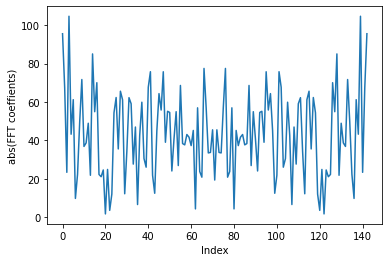

In [36]:
# get the absolute values for the coefficients
# omitting the first coefficient (constant)
fig=plt.figure()
plt.plot(abs(c[1:]))
plt.xlabel('Index')
plt.ylabel('abs(FFT coeffients)')
plt.show()

In [37]:
#  get unique coefficients and frequency axis 
K=np.ceil((N+1)/2).astype(int) # set K = N/2
print(K)
c1=c[0:K]
freq=np.arange(0,1/2+0.5/N,1/N)

73


### get the periodogram 

Text(0.5, 1.0, 'periodogram of Atlanta Temperature')

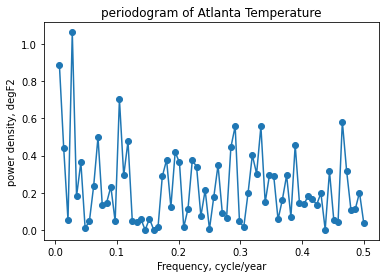

In [60]:
fig=plt.figure()
# calculate the power spectrum
P0=2*abs(c1[1:])**2/N/(N-1); # multiply by 2 because there are both positive and negative frequencies
freq0=freq[1:]; # discard the constant term (freq=0)

plt.plot(freq0,P0,'o-')
plt.xlabel('Frequency, cycle/year')
plt.ylabel('power density, degF2');
plt.title('periodogram of Atlanta Temperature')

In [68]:
# sum of power spectrum 
sum(P0)

16.475804195804205

In [69]:
# variance of original data
np.var(y,ddof=1)

16.457527195027197

### Application 1: data compression, approximation with reduced dimensions
let's pick up only strong frequency components: X% compression factor

Truncation: In the frequency domain, I look at X percentile value of Fourier coefficient, and only retain stronger coefficients by setting weaker ones to zero.


In [70]:
X=75;
P2=abs(c)**2/N/(N-1);

# get the threshold for 75% percentile 
threshold= np.percentile(P2,X)
print(threshold)
cX=np.copy(c)
cX[P2<threshold]=0 # remove all weak frequency components


0.17435423330712718


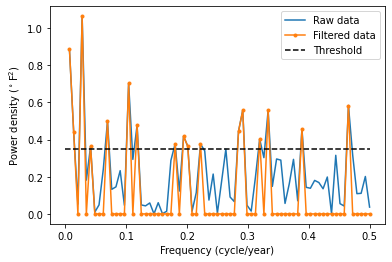

In [74]:
# plot the periodogram of filtered data
fig=plt.figure()

var0=2*abs(c[1:K])**2/N/(N-1); # full Fourier series
var1=2*abs(cX[1:K])**2/N/(N-1); # with filtered data

plt.plot(freq0,np.real(var0),'-',label='Raw data');

plt.plot(freq0,np.real(var1),'.-',label='Filtered data');
plt.plot([0, 0.5],[2*threshold,2*threshold],'--k',label='Threshold');
plt.legend();
plt.xlabel('Frequency (cycle/year)');
plt.ylabel('Power density ($^\circ$F$^2$)');

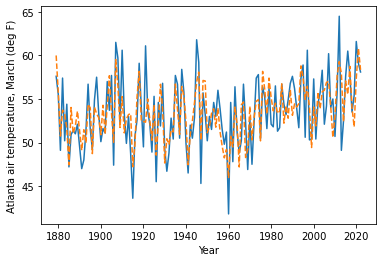

In [75]:
### inverse fft to reconstrct in time domain
yest=np.fft.ifft(cX)
fig=plt.figure()
plt.plot(x,y,label='Raw data')
plt.plot(x,np.real(yest),'--',label='Compressed data')
plt.xlabel('Year')
plt.ylabel('Atlanta air temperature, March (deg F)')
plt.show()

In [78]:
## percentage of variance explained by the filtered data
var_tot=sum(var0) # total variance calculated based on FFT coefficients
var_filtered=sum(var1) # variance of filtered data


var_y=np.var(y,ddof=1) # actually total variance
var_yest=np.var(yest,ddof=1) # actual variance of filtered data

pct=var_yest/var_tot # percentage of variance retained

print('Total variance calculated from FFT coefficients = '+str(round(var_tot,2)))
print('Actual total variance = '+str(round(var_y,2)))

print('Variance of filtered data from FFT coeff. = '+str(round(var_filtered,2)))
print('Actual variance of filtered data = '+str(round(var_yest,2)))

print(str(X),'percentile compressed data retained '+str(round(pct*100,1)),'% of variance.')

Total variance calculated from FFT coefficients = 16.48
Actual total variance = 16.46
Variance of filtered data from FFT coeff. = 8.98
Actual variance of filtered data = 9.15
75 percentile compressed data retained 55.5 % of variance.


### Application 2: low-pass FFT filter

In [82]:
f_pass=1/10 # low pass filter to remove any frequencies higher than 1/10 cycle/year (period shorter than 10 years) 
ind_low_pass=np.where(freq0<f_pass)
N_low=np.size(ind_low_pass) # determine how many terms to include
print(str(N_low)+' terms')
# take the first N_low+1 (including the first term), and the last N_low terms
cX=0*c
cX[0:N_low+1]=c[0:N_low+1]
cX[-N_low:]=c[-N_low:]

14 terms


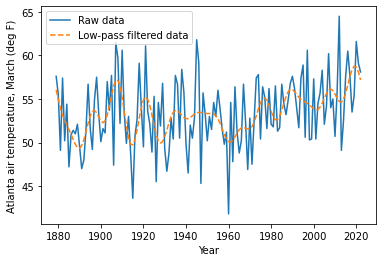

In [83]:
### inverse fft to reconstruct in time domain
yest=np.fft.ifft(cX)
fig=plt.figure()
plt.plot(x,y,label='Raw data')
plt.plot(x,np.real(yest),'--',label='Low-pass filtered data')
plt.xlabel('Year')
plt.ylabel('Atlanta air temperature, March (deg F)')
plt.legend()
plt.show()

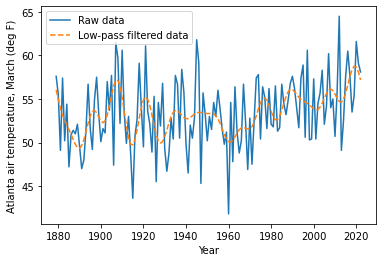

In [86]:
# alternatively, use the fft.fftfreq() function to get frequency axis (only work in Python)
f_pass=1/10 
fft_freq=np.fft.fftfreq(N)
fft_freq
cX2=0*c
cX2[abs(fft_freq)<f_pass]=c[abs(fft_freq)<f_pass]

yest=np.fft.ifft(cX2)
fig=plt.figure()
plt.plot(x,y,label='Raw data')
plt.plot(x,np.real(yest),'--',label='Low-pass filtered data')
plt.xlabel('Year')
plt.ylabel('Atlanta air temperature, March (deg F)')
plt.legend()
plt.show()